In [1]:
import pandas as pd
import sklearn.feature_selection
import sklearn.metrics
import sklearn.model_selection
import sklearn.linear_model
import sklearn.covariance
import sklearn.cross_decomposition
import sklearn.feature_extraction
import sklearn.svm
import sklearn.compose
import sklearn.preprocessing
import matplotlib.pyplot as plt

import statsmodels.api as sm
# from statsmodels.sandbox.regression.gmm import IV2SLS
from linearmodels.iv import IV2SLS

In [2]:
combo_df = pd.read_csv('combined.csv')


In [3]:
df = combo_df.__deepcopy__()

df = df[df['Price'] >= 0]
df

,Unnamed: 0,Date,Zillow,MSA,CSA,CBSA,Total,1 Unit,2 Units,3 and 4 Units,...,Population 1,Population 5,Population Diff,Population,Pop Growth 1 Year,Pop -1 Years,Pop Percent 1 Year,Pop Growth 5 Year,Pop -5 Years,Pop Percent 5 Year
0,0,2019-11-30,"Abilene, TX","Abilene, TX",999.0,10180.0,23.0,21.0,2.0,0.0,...,171795.0,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925
1,1,2019-12-31,"Abilene, TX","Abilene, TX",999.0,10180.0,37.0,31.0,6.0,0.0,...,171795.0,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925
2,2,2020-01-31,"Abilene, TX","Abilene, TX",999.0,10180.0,29.0,29.0,0.0,0.0,...,NaN,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298
3,3,2020-02-29,"Abilene, TX","Abilene, TX",999.0,10180.0,30.0,30.0,0.0,0.0,...,NaN,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298
4,4,2020-03-31,"Abilene, TX","Abilene, TX",999.0,10180.0,29.0,27.0,2.0,0.0,...,NaN,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121959,121959,2022-03-31,"Yuma, AZ","Yuma, AZ",999.0,49740.0,89.0,83.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121960,121960,2022-04-30,"Yuma, AZ","Yuma, AZ",999.0,49740.0,66.0,66.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121961,121961,2022-05-31,"Yuma, AZ","Yuma, AZ",999.0,49740.0,88.0,84.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121962,121962,2022-06-30,"Yuma, AZ","Yuma, AZ",999.0,49740.0,65.0,65.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# df = df.dropna(axis = 'columns')
# df

In [5]:
df['Date'] = pd.to_datetime(df['Date']).astype('int64')
df['Seasonal Price'] = df['Price']-df['Seasonal']
df.dtypes

Unnamed: 0                                  int64
Date                                        int64
Zillow                                     object
MSA                                        object
CSA                                       float64
CBSA                                      float64
Total                                     float64
1 Unit                                    float64
2 Units                                   float64
3 and 4 Units                             float64
5 Units or More                           float64
Num of Structures With 5 Units or More    float64
Year                                        int64
Month                                       int64
filename                                   object
Price                                     float64
Seasonal                                  float64
Trend                                     float64
Residual                                  float64
Price Change                              float64


In [6]:
df = df[['Date', 'CSA', 'Total', '1 Unit','2 Units', '3 and 4 Units', '5 Units or More',
         'Num of Structures With 5 Units or More', 'Year', 'Month', 'filename', 'Price',
         'Year as Date', 'Population 1', 'Population 5','Population Diff', 'Population', 'Pop Growth 1 Year', 'Pop -1 Years','Pop Percent 1 Year', 'Pop Growth 5 Year', 'Pop -5 Years',
         'Pop Percent 5 Year', 'Seasonal Price']]
df

,Date,CSA,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Num of Structures With 5 Units or More,Year,Month,...,Population 5,Population Diff,Population,Pop Growth 1 Year,Pop -1 Years,Pop Percent 1 Year,Pop Growth 5 Year,Pop -5 Years,Pop Percent 5 Year,Seasonal Price
0,1575072000000000000,999.0,23.0,21.0,2.0,0.0,0.0,0.0,2019,11,...,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925,80051.677083
1,1577750400000000000,999.0,37.0,31.0,6.0,0.0,0.0,0.0,2019,12,...,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925,81005.614583
2,1580428800000000000,999.0,29.0,29.0,0.0,0.0,0.0,0.0,2020,1,...,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298,81734.822917
3,1582934400000000000,999.0,30.0,30.0,0.0,0.0,0.0,0.0,2020,2,...,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298,83491.781250
4,1585612800000000000,999.0,29.0,27.0,2.0,0.0,0.0,0.0,2020,3,...,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298,85660.489583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121959,1648684800000000000,999.0,89.0,83.0,6.0,0.0,0.0,0.0,2022,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356347.574653
121960,1651276800000000000,999.0,66.0,66.0,0.0,0.0,0.0,0.0,2022,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362600.157986
121961,1653955200000000000,999.0,88.0,84.0,4.0,0.0,0.0,0.0,2022,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371571.157986
121962,1656547200000000000,999.0,65.0,65.0,0.0,0.0,0.0,0.0,2022,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377487.491319


In [7]:
# from sklearn.pipeline import make_pipeline
#
# model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

df1 = df.dropna(axis = 'rows')

X1 = df1[['Date', 'CSA', 'Total', '1 Unit','2 Units', '3 and 4 Units', '5 Units or More',
         'Num of Structures With 5 Units or More', 'Year', 'Month','Population 1', 'Population 5','Population Diff', 'Population', 'Pop Growth 1 Year', 'Pop -1 Years','Pop Percent 1 Year', 'Pop Growth 5 Year', 'Pop -5 Years',
         'Pop Percent 5 Year']].to_numpy()
# print(X1)
y1 = df1['Price'].to_numpy()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X1,y1)
scaler1 = sklearn.preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# sklearn.metrics.accuracy_score(y_test, y_pred)
# print(y_pred/y_test)



-374722.0
1611143.0
-882.4508030183101
[ 181353. -158995.   69226. ...   -9993.   37308.  255148.]


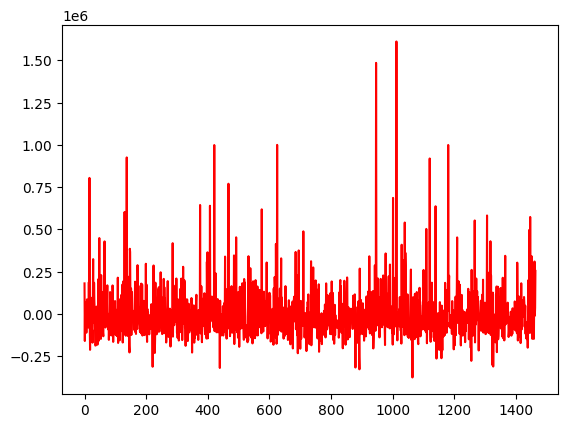

In [11]:
# plt.plot(y_pred, color = 'blue')
# plt.plot(y_test, color = 'green')

y_diff = y_test - y_pred
plt.plot(y_diff, color = 'red')
print(y_diff.min())
print(y_diff.max())
print(y_diff.mean())
# print(y_diff.median())
print(y_diff)

In [12]:
linear_reg = sklearn.linear_model.LinearRegression()

ohe = sklearn.preprocessing.OneHotEncoder(sparse = False, handle_unknown='ignore')


In [13]:
df = df.dropna(axis = 'rows')
X = df.drop(['Price'], axis = 'columns')
print(X.sample(5))
# print(X.head())
y = df[['Price']]
col_transform = sklearn.compose.make_column_transformer((ohe, ['filename']))

#
# X = pd.DataFrame(scaled, columns = X.columns)

col_transform.fit_transform(X)

print(col_transform)


                      Date    CSA  Total  1 Unit  2 Units  3 and 4 Units  \
72009  1575072000000000000  999.0   86.0    72.0     10.0            4.0   
88412  1577750400000000000  428.0   93.0    83.0      4.0            0.0   
15597  1577750400000000000  999.0   15.0    15.0      0.0            0.0   
84859  1575072000000000000  556.0   98.0    56.0     28.0            0.0   
28505  1575072000000000000  999.0   15.0    11.0      4.0            0.0   

       5 Units or More  Num of Structures With 5 Units or More  Year  Month  \
72009              0.0                                     0.0  2019     11   
88412              6.0                                     1.0  2019     12   
15597              0.0                                     0.0  2019     12   
84859             14.0                                     1.0  2019     11   
28505              0.0                                     0.0  2019     11   

       ... Population 5 Population Diff  Population  Pop Growth 1 Ye

In [14]:
df2 = df.dropna(axis = 'rows')
df2.head()

,Date,CSA,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Num of Structures With 5 Units or More,Year,Month,...,Population 5,Population Diff,Population,Pop Growth 1 Year,Pop -1 Years,Pop Percent 1 Year,Pop Growth 5 Year,Pop -5 Years,Pop Percent 5 Year,Seasonal Price
0,1575072000000000000,999.0,23.0,21.0,2.0,0.0,0.0,0.0,2019,11,...,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925,80051.677083
1,1577750400000000000,999.0,37.0,31.0,6.0,0.0,0.0,0.0,2019,12,...,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925,81005.614583
33,1575072000000000000,184.0,38.0,38.0,0.0,0.0,0.0,0.0,2019,11,...,703845.0,-0.000520,703845.0,-609.0,704454.0,-0.000864,828.0,703017.0,0.001178,68155.432292
34,1577750400000000000,184.0,30.0,30.0,0.0,0.0,0.0,0.0,2019,12,...,703845.0,-0.000520,703845.0,-609.0,704454.0,-0.000864,828.0,703017.0,0.001178,68306.848958
66,1575072000000000000,999.0,12.0,12.0,0.0,0.0,0.0,0.0,2019,11,...,148436.0,-0.007138,148436.0,-4665.0,153101.0,-0.030470,-8270.0,156706.0,-0.052774,83911.383681


In [15]:
X2 = df2[['Date', 'CSA', 'Total', '1 Unit','2 Units', '3 and 4 Units', '5 Units or More',
         'Num of Structures With 5 Units or More', 'Year', 'Month','Population 1', 'Population 5','Population Diff', 'Population', 'Pop Growth 1 Year', 'Pop -1 Years','Pop Percent 1 Year', 'Pop Growth 5 Year', 'Pop -5 Years',
         'Pop Percent 5 Year']].to_numpy()
# print(X1)
poly = sklearn.preprocessing.PolynomialFeatures(5)
poly.fit_transform(X2)


y2 = df2['Price'].to_numpy()



# X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(X2,y2)
# scaler2 = sklearn.preprocessing.StandardScaler(with_mean=False).fit(X_train2)
#
#
# X_train2 = scaler2.transform(X_train2)
# X_test2 = scaler2.transform(X_test2)
# svc = sklearn.svm.SVC(kernel = 'linear')
#
# svc.fit(X_train2, y_train2)
# y_pred2 = svc.predict(X_test2)


In [16]:

endog = df.columns.to_list()
endog.remove('Price')
endog.remove('filename')
endog.remove('Seasonal Price')

x_const = sm.add_constant(df[endog])
first_model_results = sm.OLS(y, x_const).fit()
first_model_results.summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [17]:
y_seas_adj = df['Seasonal Price']

second_model_results = sm.OLS(y_seas_adj, x_const).fit()
second_model_results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [40]:

iv2sls_model = IV2SLS(y, df[endog], None, None ).fit(cov_type="unadjusted")
print(iv2sls_model)

ValueError: regressors [exog endog] do not have full column rank

In [ ]:


pipe = sklearn.pipeline.make_pipeline(col_transform, linear_reg)

In [ ]:
sklearn.metrics.get_scorer_names()

In [ ]:
for scoring in sklearn.metrics.get_scorer_names():
    print(scoring)
    try:
        sklearn.model_selection.cross_val_score(pipe, X, y, cv=5, scoring = scorer).mean()
    except: continue

In [ ]:
# ind_vars = ['CSA', 'CBSA', 'Total', '1 Unit','2 Units', '3 and 4 Units', '5 Units or More',
#             'Num of Structures With 5 Units or More', 'Year', 'Month', 'Population 1', 'Population 5',
#             'Population Diff','Population', 'Pop Growth 1 Year', 'Pop -1 Years','Pop Percent 1 Year',
#             'Pop Growth 5 Year',
#             'Pop -5 Years','Pop Percent 5 Year', 'Single Unit ratio']
# dep_vars = ['Price']
#
# cols = ['CSA', 'CBSA', 'Total', '1 Unit','2 Units', '3 and 4 Units', '5 Units or More',
#         'Num of Structures With 5 Units or More', 'Year', 'Month', 'Population 1', 'Population 5',
#         'Population Diff','Population', 'Pop Growth 1 Year', 'Pop -1 Years','Pop Percent 1 Year',
#         'Pop Growth 5 Year','Pop -5 Years','Pop Percent 5 Year', 'Single Unit ratio', 'Price']
#
# # print(cols)
# no_null_df = combo_df[cols].dropna()
# # print(no_null_df.head())
# x = no_null_df[ind_vars]
# y = no_null_df[dep_vars]
# #
# print(x.head())
#
# x_const = sm.add_constant(x)
#
# first_model_results = sm.OLS(y, x_const).fit_regularized()
# first_model_results.summary()